Mathematical Formulation

1.Forward propagation equations:

 a[1] = g(w₁x + b₁)
 a[2] = g(w₂a[1] + b₂)
 ŷ = g(w₃a[2] + b₃)
 where g(·) is the chosen activation.

2. Loss function:
 J = (1/m)* Σ (ŷᵢ - yᵢ)²

3. Gradient descent update rule:
 wₗ ← wₗ - η ∂J/∂wₗ
 bₗ ← bₗ - η ∂J/∂bₗ

 where:
 - l = 1, 2, 3 (layer index)
 - η is the learning rate
 - ∂J/∂wₗ and ∂J/∂bₗ are gradients


**Import Required Libraries**



In [ ]:
import numpy as np
import matplotlib.pyplot as plt


**Generate Dataset**

In [ ]:
# Generate 25 samples uniformly between -10 and 10
x = np.linspace(-10, 10, 25)
# Target function
def f(x):
    return np.exp(-np.sin(x**2)/2) + x

y = f(x)

# Shuffle and split data
data = list(zip(x, y))
np.random.shuffle(data)

train_data = data[:20]
test_data = data[20:]

x_train, y_train = np.array([d[0] for d in train_data]), np.array([d[1] for d in train_data])
x_test, y_test = np.array([d[0] for d in test_data]), np.array([d[1] for d in test_data])


**Initialize Parameters**

In [ ]:
np.random.seed(42)  # For reproducibility

# Initialize weights and biases randomly
w1, b1 = np.random.randn(), np.random.randn()
w2, b2 = np.random.randn(), np.random.randn()
w3, b3 = np.random.randn(), np.random.randn()
# Learning rate
lr = 0.01


Activation Function and Derivative

In [ ]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2


Training Loop

In [ ]:
epochs = 10000
loss_history = []

for epoch in range(epochs):
    total_loss = 0

    for i in range(len(x_train)):
        xi = x_train[i]
        yi = y_train[i]

        # Forward pass
        z1 = w1 * xi + b1
        a1 = tanh(z1)

        z2 = w2 * a1 + b2
        a2 = tanh(z2)

        z3 = w3 * a2 + b3
        y_pred = z3  # No activation in last layer for regression

        # Compute loss (MSE)
        loss = (y_pred - yi)**2
        total_loss += loss

        # Backward pass
        d_loss_y_pred = 2 * (y_pred - yi)

        # Gradients for w3, b3
        d_w3 = d_loss_y_pred * a2
        d_b3 = d_loss_y_pred

        # Gradients for w2, b2
        d_a2 = d_loss_y_pred * w3
        d_z2 = d_a2 * tanh_derivative(z2)
        d_w2 = d_z2 * a1
        d_b2 = d_z2

        # Gradients for w1, b1
        d_a1 = d_z2 * w2
        d_z1 = d_a1 * tanh_derivative(z1)
        d_w1 = d_z1 * xi
        d_b1 = d_z1

        # Update weights and biases
        w3 -= lr * d_w3
        b3 -= lr * d_b3
        w2 -= lr * d_w2
        b2 -= lr * d_b2
        w1 -= lr * d_w1
        b1 -= lr * d_b1

    loss_history.append(total_loss / len(x_train))

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {total_loss / len(x_train):.4f}')


Epoch 0, Loss: 35.9782
Epoch 1000, Loss: 8.2853
Epoch 2000, Loss: 8.2849
Epoch 3000, Loss: 8.2842
Epoch 4000, Loss: 8.2814
Epoch 5000, Loss: 8.2866
Epoch 6000, Loss: 8.2862
Epoch 7000, Loss: 8.2862
Epoch 8000, Loss: 8.2862
Epoch 9000, Loss: 8.2862


Plot Loss Curve

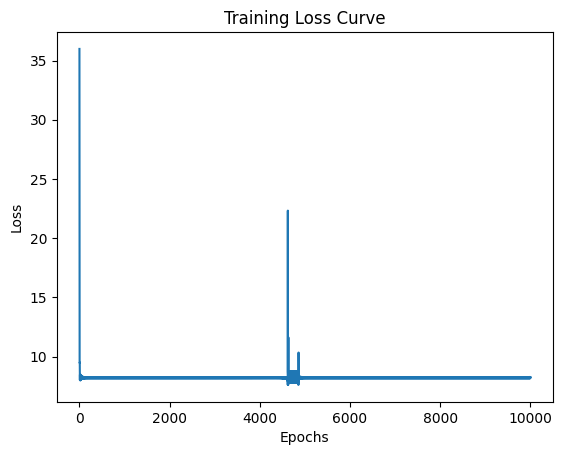

In [ ]:
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()


Predictions and Plot True vs Predicted

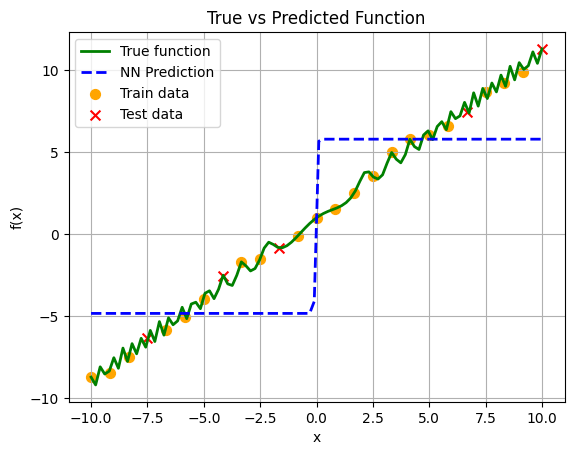

In [ ]:
# True function
x_plot = np.linspace(-10, 10, 100)
y_true = f(x_plot)

# Model predictions
def predict(x_input):
    a1 = tanh(w1 * x_input + b1)
    a2 = tanh(w2 * a1 + b2)
    y_out = w3 * a2 + b3
    return y_out

y_pred_plot = predict(x_plot)

# Plot with custom colors
plt.plot(x_plot, y_true, label='True function', color='green', linewidth=2)
plt.plot(x_plot, y_pred_plot, label='NN Prediction', color='blue', linestyle='--', linewidth=2)
plt.scatter(x_train, y_train, label='Train data', color='orange', marker='o', s=50)
plt.scatter(x_test, y_test, label='Test data', color='red', marker='x', s=50)

plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('True vs Predicted Function')
plt.grid(True)
plt.show()


Report Training and Test Error

In [ ]:
train_preds = predict(x_train)
test_preds = predict(x_test)

train_mse = np.mean((train_preds - y_train)**2)
test_mse = np.mean((test_preds - y_test)**2)

print(f'Training MSE: {train_mse:.4f}')
print(f'Test MSE: {test_mse:.4f}')


Training MSE: 7.9451
Test MSE: 11.3338
